In [2]:
### BASIC INFO AND NOTES ON THE DATASET ###

# no missing data in any column

# age in years

# sex
# (1 = male; 0 = female)

# cp
# chest pain type

# trestbps
# resting blood pressure (in mm Hg on admission to the hospital)

# chol
# serum cholestoral in mg/dl

# fbs
# (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

# restecg
# resting electrocardiographic results

# thalach
# maximum heart rate achieved

# exang
# exercise induced angina (1 = yes; 0 = no)

# oldpeak
# ST depression induced by exercise relative to rest

# slope
# the slope of the peak exercise ST segment

# ca
# number of major vessels (0-3) colored by flourosopy

# thal
# 3 = normal; 6 = fixed defect; 7 = reversable defect (find out if these are categorized as 1, 2, 3)

# target
# 1 or 0 

In [3]:
import pandas as pd
import numpy as np

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, \
                    discriminant_analysis, gaussian_process
import xgboost as xgb

#Common Model Helpers
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
# import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\kovus\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Gather Data

In [4]:
# read in the data from local folder
df = pd.read_csv('C:/Users/kovus/Documents/Projects/heart_uci/data/heart.csv')

# take a look at first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)

In [6]:
# Are there any missing values?
print('There is(are) {} total missing values in dataset'.format(df.isnull().sum().sum()))

# Are there any duplicated samples?
print('There is(are) {} duplicated rows in dataset'.format(df.duplicated().sum()))

There is(are) 0 total missing values in dataset
There is(are) 1 duplicated rows in dataset


In [7]:
# make sure it is a duplicate
df.loc[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
# drop duplicated row
df.drop_duplicates(keep='first', inplace=True)

In [9]:
# preview information on features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
# statistical information on features
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# define a target vector
y = df['target']

# define a features matrix
X = df.drop('target', axis=1)

# look at the sizes of target vector and features matrix
X.shape, y.shape

((302, 13), (302,))

### Dummies!!!

In [12]:
cat_cols = X.columns[X.nunique() <= 10]
print(cat_cols)
ord_cols = X.columns[X.nunique() > 10]
print(ord_cols)

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')


In [13]:
for col in cat_cols:
    X = X.astype({col:'category'})
X.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
dtype: object

In [15]:
df.memory_usage(deep=True)

Index       2416
age         2416
sex         2416
cp          2416
trestbps    2416
chol        2416
fbs         2416
restecg     2416
thalach     2416
exang       2416
oldpeak     2416
slope       2416
ca          2416
thal        2416
target      2416
dtype: int64

In [14]:
X.memory_usage(deep=True)

Index       2416
age         2416
sex          398
cp           494
trestbps    2416
chol        2416
fbs          398
restecg      406
thalach     2416
exang        398
oldpeak     2416
slope        406
ca           502
thal         494
dtype: int64

In [128]:
# # Label encode categorical variables.

# label_encoder = LabelEncoder()
# mappings = []

# # Desired label orders for categorical columns.

# educ_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
# month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

# # using cat.codes for order, one hot for high cardinality and weak case of cardinality.

# def ordered_labels(df, col, order):
#     df[col] = df[col].astype('category')
#     df[col] = df[col].cat.reorder_categories(order, ordered=True)
#     df[col] = df[col].cat.codes.astype(int)

# # Use dummy variables for occupation
# X_df = pd.concat([X_df, pd.get_dummies(X_df['job'])],axis=1).drop('job',axis=1)

# # Use ordered cat.codes for days, months, and education
# ordered_labels(X_df, 'education', educ_order)
# ordered_labels(X_df, 'month', month_order)
# ordered_labels(X_df, 'day_of_week', day_order)

# # Same label encoding for rest since low cardinality
# for i, col in enumerate(X_df):
#     if X_df[col].dtype == 'object':
#         X_df[col] = label_encoder.fit_transform(np.array(X_df[col].astype(str)).reshape((-1,)))
#         mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

# X_df.head()

In [21]:
X = pd.get_dummies(X, drop_first=True)
X.head()    

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [22]:
X.rename(columns={'sex_1':'sex_male', 'fbs_1':'fbs_pos', 'exang_1':'exang_pos'}, inplace=True)
X.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_male', 'cp_1',
       'cp_2', 'cp_3', 'fbs_pos', 'restecg_1', 'restecg_2', 'exang_pos',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [24]:
X.memory_usage(deep=True).sum()

19630

### Sample Data

In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=43)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((211, 22), (91, 22), (211,), (91,))

### Normalize Data

In [27]:
sca = StandardScaler()
cols = X_train.columns
X_train = pd.DataFrame(sca.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(sca.fit_transform(X_test), columns=cols)

In [28]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_male,cp_1,cp_2,cp_3,fbs_pos,...,exang_pos,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,1.205178,1.560971,-0.453754,-0.450805,1.181399,0.637704,-0.422813,-0.623023,-0.314576,-0.453557,...,-0.750309,-0.985882,1.094494,-0.528004,-0.374887,-0.276642,-0.120096,4.072264,-1.053565,-0.837623
1,0.000519,0.018278,2.012808,-0.712123,0.168085,0.637704,-0.422813,-0.623023,-0.314576,-0.453557,...,1.332785,1.014321,-0.913664,1.893926,-0.374887,-0.276642,-0.120096,-0.245564,-1.053565,1.193854
2,1.205178,1.560971,-0.098569,-1.234760,-0.937348,0.637704,2.365111,-0.623023,-0.314576,-0.453557,...,1.332785,1.014321,-0.913664,-0.528004,-0.374887,3.614784,-0.120096,4.072264,-1.053565,-0.837623
3,-0.108995,3.324048,0.631533,2.031718,-0.937348,0.637704,2.365111,-0.623023,-0.314576,-0.453557,...,-0.750309,-0.985882,1.094494,1.893926,-0.374887,-0.276642,-0.120096,-0.245564,-1.053565,1.193854
4,0.438577,1.560971,0.434208,-1.016994,-0.937348,0.637704,-0.422813,-0.623023,3.178878,-0.453557,...,-0.750309,-0.985882,1.094494,-0.528004,-0.374887,-0.276642,-0.120096,-0.245564,0.949158,-0.837623


### Refactor?

### Baseline Model

In [29]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier()
dc.fit(X_train, y_train)
dc.score(X_test, y_test)

0.45054945054945056

In [31]:
print('Precision score:', metrics.precision_score(y_test, dc.predict(X_test)))
print('F1 score:', metrics.f1_score(y_test, dc.predict(X_test)))

Precision score: 0.49019607843137253
F1 score: 0.5806451612903226


### Various Families

In [32]:
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)
X.shape, y.shape

((302, 22), (302,))

In [33]:
for model in [DummyClassifier,
              linear_model.LogisticRegression,
              tree.DecisionTreeClassifier,
              neighbors.KNeighborsClassifier,
              naive_bayes.GaussianNB,
              svm.SVC,
              ensemble.RandomForestClassifier,
              xgb.XGBClassifier
             ]:
    classifier = model()
    kfold = model_selection.KFold(n_splits=10, random_state=43)
    score = model_selection.cross_val_score(classifier, X, y, scoring='roc_auc', cv=kfold)
    print(f'{model.__name__:25}'
          f'AUC: {score.mean():.3f} STD: {score.std():.3f}')

DummyClassifier          AUC: 0.441 STD: 0.079
LogisticRegression       AUC: 0.913 STD: 0.041
DecisionTreeClassifier   AUC: 0.731 STD: 0.071
KNeighborsClassifier     AUC: 0.882 STD: 0.052
GaussianNB               AUC: 0.862 STD: 0.103
SVC                      AUC: 0.899 STD: 0.055
RandomForestClassifier   AUC: 0.872 STD: 0.074
XGBClassifier            AUC: 0.873 STD: 0.066


### Stacking

In [34]:
from mlxtend.classifier import StackingClassifier

classifiers = [x() for x in [DummyClassifier,
                             linear_model.LogisticRegression,
                             tree.DecisionTreeClassifier,
                             neighbors.KNeighborsClassifier,
                             naive_bayes.GaussianNB,
                             svm.SVC,
                             ensemble.RandomForestClassifier,
                             xgb.XGBClassifier
                            ]
              ]

# meta_classifier???
stc = StackingClassifier(classifiers=classifiers, meta_classifier=linear_model.LogisticRegression())
score = model_selection.cross_val_score(stc, X, y, scoring='roc_auc', cv=kfold)
print(f'stc.__name__:'
      f'AUC: {score.mean():.3f} STD: {score.std():.3f}')
print('Stacking doesn\'t look like it\'s worth it')

stc.__name__:AUC: 0.872 STD: 0.058
Stacking doesn't look like it's worth it


### Random Forest Classifier

In [35]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=43)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=43)

In [36]:
rf.score(X_test, y_test)

0.8131868131868132

In [37]:
print('Precision score:', metrics.precision_score(y_test, rf.predict(X_test)))
print('ROC_AUC score:', metrics.roc_auc_score(y_test, rf.predict(X_test)))
print('F1 score:', metrics.f1_score(y_test, rf.predict(X_test)))

Precision score: 0.7796610169491526
ROC_AUC score: 0.8014634146341463
F1 score: 0.8440366972477064


In [38]:
# Feature Importances
for col, val in sorted(zip(X_train.columns, rf.feature_importances_),
                       key = lambda x: x[1],
                       reverse=True
                      ):
    print(f'{col:10} {val:10.3f}')

oldpeak         0.115
thalach         0.114
age             0.089
chol            0.086
trestbps        0.083
exang_pos       0.077
thal_2          0.074
thal_3          0.074
slope_2         0.048
slope_1         0.036
cp_2            0.033
sex_male        0.026
ca_2            0.024
cp_3            0.024
ca_1            0.024
restecg_1       0.024
cp_1            0.015
fbs_pos         0.012
ca_3            0.011
thal_1          0.006
ca_4            0.002
restecg_2       0.001


In [39]:
# Add Visualization for feature importance

### Confusion Matrix

### Optimize Model

In [40]:
rf_test = ensemble.RandomForestClassifier(random_state=43)
params = {'max_features': [0.4, 'auto'],
          'n_estimators': [15, 200],
          'min_samples_leaf': [1, 0.1],
          'random_state': [43]
         }
cv = model_selection.GridSearchCV(rf, params, n_jobs=-1).fit(X_train, y_train)
print(cv.best_params_)

{'max_features': 'auto', 'min_samples_leaf': 0.1, 'n_estimators': 200, 'random_state': 43}


In [41]:
rf_best = ensemble.RandomForestClassifier(**{'max_features': 'auto',
                                             'n_estimators': 200,
                                             'min_samples_leaf': 0.1,
                                             'random_state': 43
                                            })
rf_best.fit(X_train, y_train)
rf_best.score(X_test, y_test)

0.8351648351648352

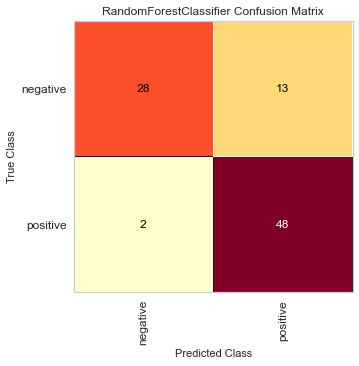

In [43]:
from yellowbrick.classifier import ConfusionMatrix

fig, ax = plt.subplots(figsize=(5, 5))
cm_viz = ConfusionMatrix(rf_best, classes=['negative', 'positive'], label_encoder={0:'negative', 1:'positive'})
cm_viz.score(X_test, y_test)
cm_viz.poof();

### ROC Curve

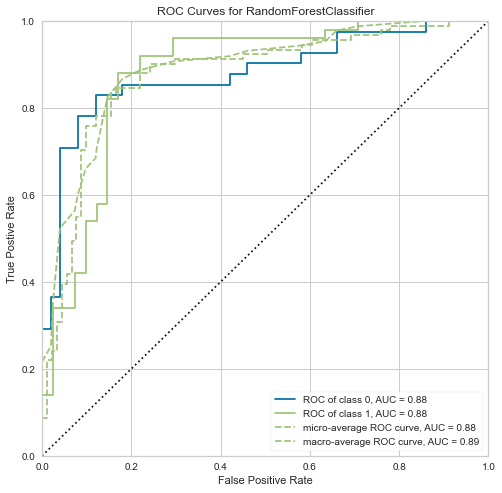

In [44]:
from yellowbrick.classifier import ROCAUC
fig, ax = plt.subplots(figsize=(8, 8))
roc_viz = ROCAUC(rf_best)
roc_viz.score(X_test, y_test)
roc_viz.poof();

### Learning Curve

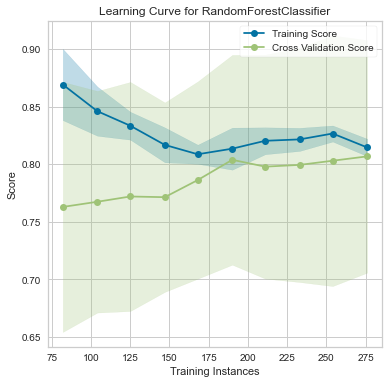

In [45]:
from yellowbrick.model_selection import LearningCurve

fig, ax = plt.subplots(figsize=(6, 6))
cv = model_selection.StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(rf_best, cv=cv, train_sizes=sizes, scoring='f1_weighted', n_jobs=-1, ax=ax)
lc_viz.fit(X, y)
lc_viz.poof();

In [152]:
# Seems like there is NO overfitting! Looks very good, suspiciously good!

### Exploring Data

In [153]:
X.shape, y.shape

((302, 22), (302,))

In [154]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((211, 22), (91, 22), (211,), (91,))

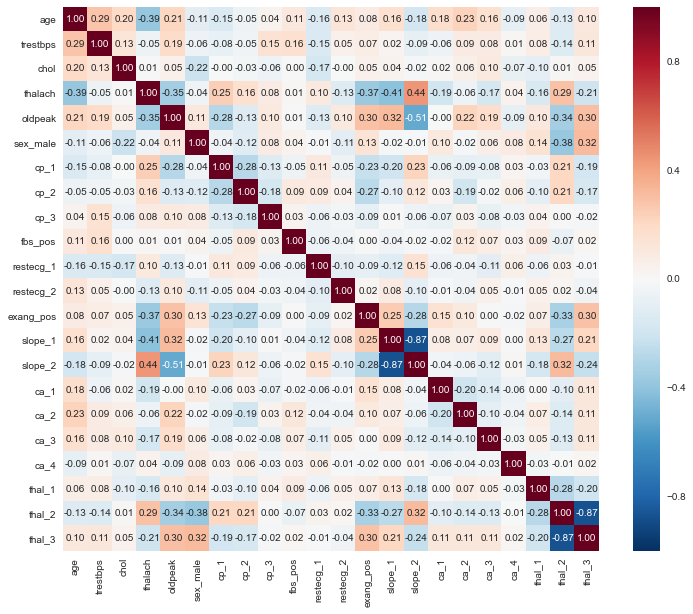

In [156]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(X.corr(), fmt='.2f', annot=True, ax=ax, cmap='RdBu_r', vmin=-1, vmax=1);

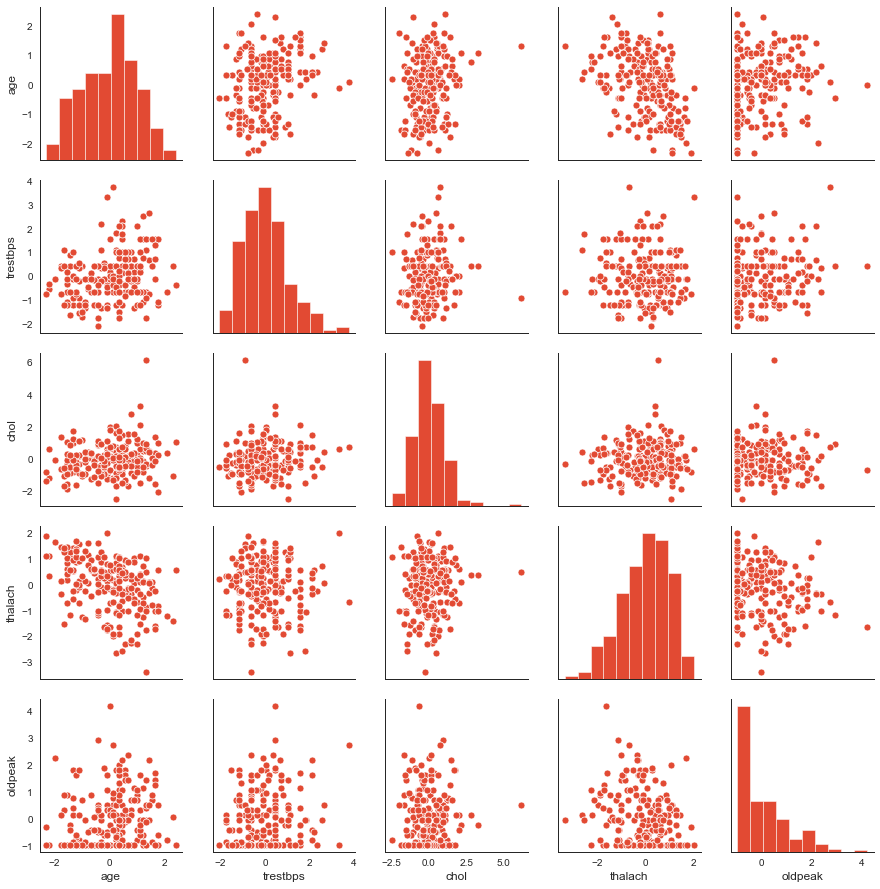

In [158]:
sns.pairplot(X_train.loc[:, ord_cols]);

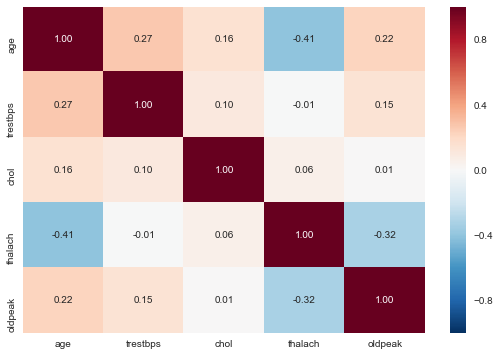

In [159]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(X_train.loc[:, ord_cols].corr(), fmt='.2f', annot=True, ax=ax, cmap='RdBu_r', vmin=-1, vmax=1);

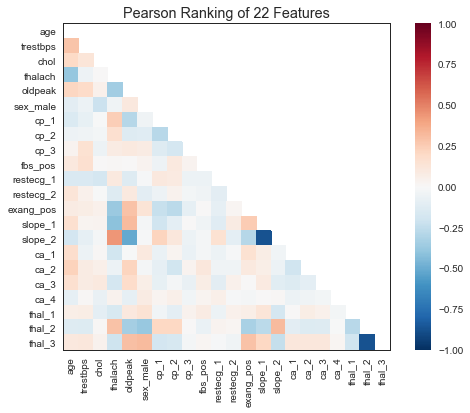

In [160]:
from yellowbrick.features import Rank2D

fig, ax = plt.subplots(figsize=(9, 6))
pcv = Rank2D(features=X.columns, algorithm='pearson')
pcv.fit(X, y)
pcv.transform(X)
pcv.poof();

### Comparing Two Ordinal Values

In [161]:
ord_cols

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

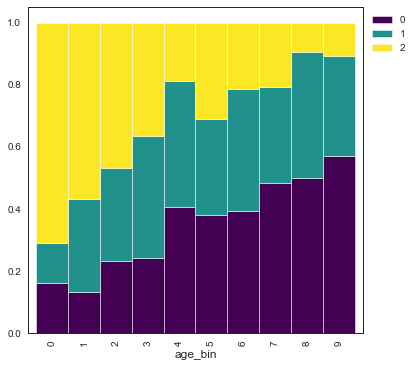

In [162]:
fig, ax = plt.subplots(figsize = (6, 6))
X.assign(age_bin = pd.qcut(X['age'], q=10, labels=False),
         trest_bin = pd.qcut(X['thalach'], q=3, labels=False))\
.groupby(['age_bin', 'trest_bin'])\
.size()\
.unstack()\
.pipe(lambda df: df.div(df.sum(1), axis=0))\
.plot(kind='bar', stacked=True, width=1, ax=ax, cmap='viridis')\
.legend(bbox_to_anchor=(1, 1));

### Parallel Coordinates

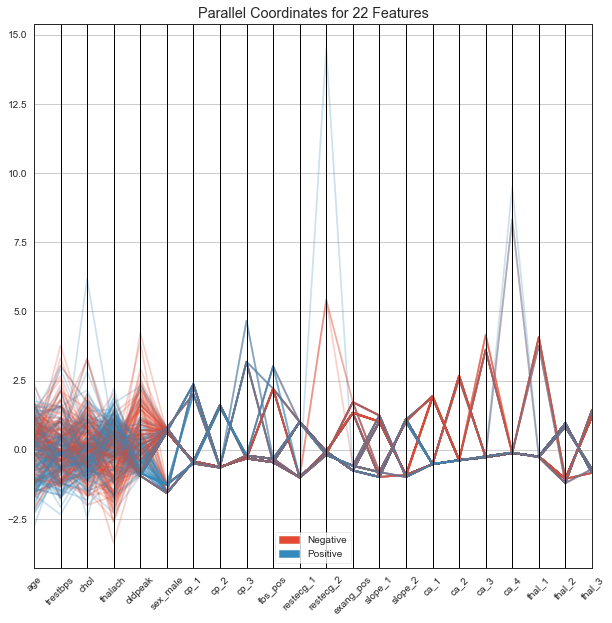

In [166]:
from yellowbrick.features import ParallelCoordinates

fig, ax = plt.subplots(figsize=(10, 10))
pc = ParallelCoordinates(classes=['Negative', 'Positive'], features=X.columns)
pc.fit(X, y)
pc.transform(X)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
pc.poof();

### Preprocess Data ??

### Feature Selection

In [176]:
# from rfpimp import *
# rfpimp.plot_dependence_heatmap(feature_dependence_matrix(X_train),
#                                value_fontsize = 12,
#                                label_fontsize = 14,
#                                figsize=(8,8),
#                                sn
#                               )
# fig = plt.gcf()

SyntaxError: positional argument follows keyword argument (<ipython-input-176-a5c1cf9d4500>, line 6)

### RFE

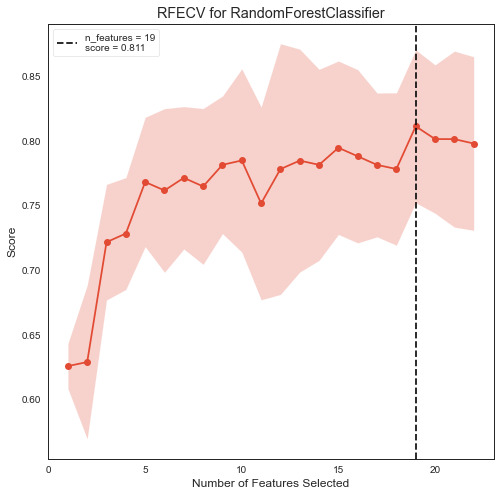

In [183]:
from yellowbrick.features import RFECV
fig, ax = plt.subplots(figsize=(8 ,8))
rfe = RFECV(ensemble.RandomForestClassifier(n_estimators=100), cv=5)
rfe.fit(X, y)
rfe.poof();

In [184]:
rfe.rfe_estimator_.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1])

In [185]:
rfe.rfe_estimator_.n_features_

19

In [186]:
X.columns[rfe.rfe_estimator_.support_]

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_male', 'cp_1',
       'cp_2', 'cp_3', 'fbs_pos', 'restecg_1', 'exang_pos', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'thal_2', 'thal_3'],
      dtype='object')

### Mutual Information

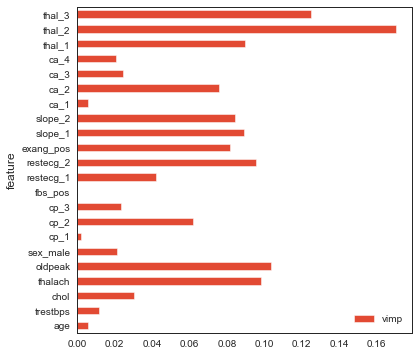

In [188]:
mic = feature_selection.mutual_info_classif(X, y)
fig, ax = plt.subplots(figsize=(6, 6))
pd.DataFrame({'feature':X.columns, 'vimp':mic}).set_index('feature').plot.barh(ax=ax);


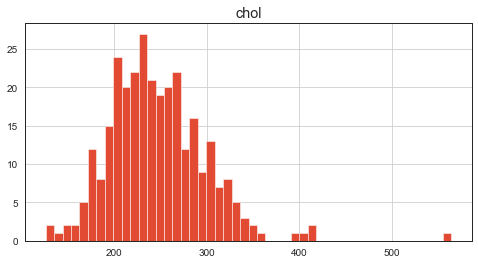

In [16]:
df.hist(column='chol', grid=True, figsize=(8,4), bins=df.age.max()-df.age.min());

In [18]:
# EXPLORATORY ANALYSIS WITH STATISTICS
#Discrete Variable Correlation by Target using
#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
for col in df.columns:
    if df[col].nunique() < 5 and col != 'target':
        print('Target Correlation by:', col)
        print(df[[col, 'target']].groupby(col, as_index=False).mean())
        print('-'*25, '\n')

Target Correlation by: sex
   sex    target
0    0  0.750000
1    1  0.449275
------------------------- 

Target Correlation by: cp
   cp    target
0   0  0.272727
1   1  0.820000
2   2  0.793103
3   3  0.695652
------------------------- 

Target Correlation by: fbs
   fbs    target
0    0  0.550388
1    1  0.511111
------------------------- 

Target Correlation by: restecg
   restecg    target
0        0  0.462585
1        1  0.631579
2        2  0.250000
------------------------- 

Target Correlation by: exang
   exang    target
0      0  0.696078
1      1  0.232323
------------------------- 

Target Correlation by: slope
   slope    target
0      0  0.428571
1      1  0.350000
2      2  0.753521
------------------------- 

Target Correlation by: thal
   thal    target
0     0  0.500000
1     1  0.333333
2     2  0.783133
3     3  0.239316
------------------------- 



In [19]:
#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
for col in df.columns:
    if df[col].nunique() < 5 and col != 'target':
        print('Target Crosstab by:', col)
        print(pd.crosstab(df[col], df['target']))
        print('-'*10, '\n')

Target Crosstab by: sex
target    0   1
sex            
0        24  72
1       114  93
---------- 

Target Crosstab by: cp
target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16
---------- 

Target Crosstab by: fbs
target    0    1
fbs             
0       116  142
1        22   23
---------- 

Target Crosstab by: restecg
target    0   1
restecg        
0        79  68
1        56  96
2         3   1
---------- 

Target Crosstab by: exang
target   0    1
exang          
0       62  142
1       76   23
---------- 

Target Crosstab by: slope
target   0    1
slope          
0       12    9
1       91   49
2       35  107
---------- 

Target Crosstab by: thal
target   0    1
thal           
0        1    1
1       12    6
2       36  130
3       89   28
---------- 



In [20]:
#IMPORTANT: Intentionally plotted different ways for learning purposes only. 

#optional plotting w/pandas: https://pandas.pydata.org/pandas-docs/stable/visualization.html

#we will use matplotlib.pyplot: https://matplotlib.org/api/pyplot_api.html

#to organize our graphics will use figure: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#subplot: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
#and subplotS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots

In [21]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

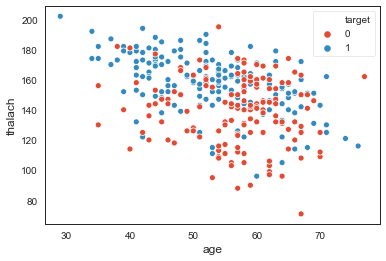

In [22]:
sns.scatterplot(x=df['age'], y=df['thalach'], hue=df['target'])

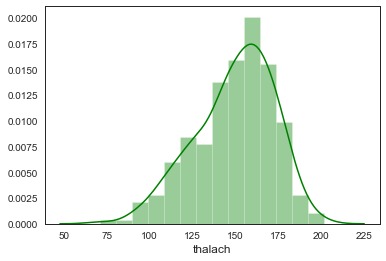

In [23]:
sns.distplot(a=df.thalach, color='green')

In [24]:
# sns.jointplot(x=df.age, y=df.thalach, kind='kde')

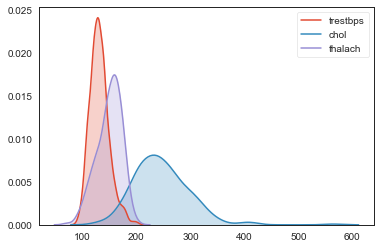

In [25]:
for col in ['trestbps', 'chol', 'thalach']:
    sns.kdeplot(data=df[col], shade=True)

In [26]:
# for col in ['trestbps', 'chol', 'thalach']:
#     sns.distplot(a=df[col], kde=True)

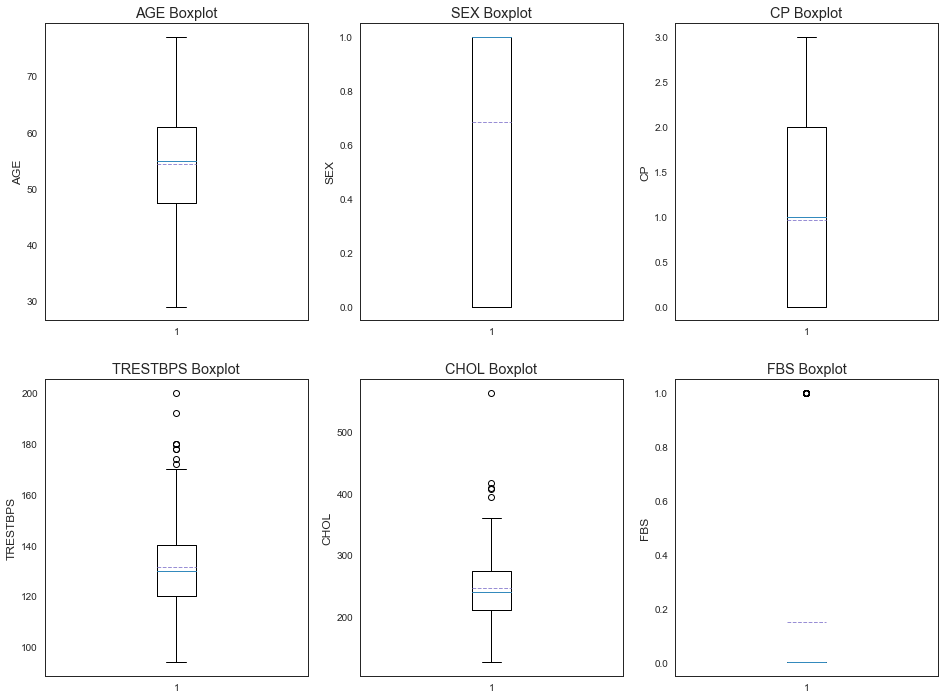

In [27]:
#graph distribution of quantitative data
plt.figure(figsize=[16,12])

i=0
for col in df.columns[0:6]: #[input index of desired columns]
#     if df[col].nunique() < 5 and col != 'target':
    i += 1
    plt.subplot(230+i)
    plt.boxplot(x=df[col], showmeans = True, meanline = True)
    plt.title('{} Boxplot'.format(col.upper()))
    plt.ylabel('{}'.format(col.upper()))

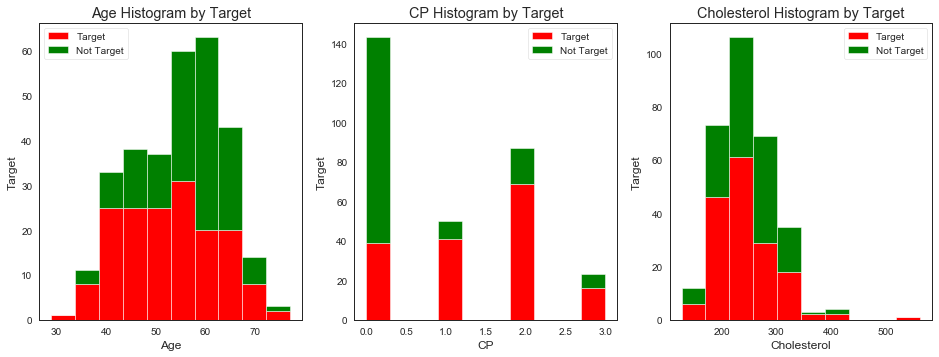

In [38]:
# add target!!

#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.hist(x = [df[df['target']==1]['age'], df[df['target']==0]['age']], 
         stacked=True, color = ['r','g'],label = ['Target','Not Target'])
plt.title('Age Histogram by Target')
plt.xlabel('Age')
plt.ylabel('Target')
plt.legend()

plt.subplot(232)
plt.hist(x = [df[df['target']==1]['cp'], df[df['target']==0]['cp']], 
         stacked=True, color = ['r','g'],label = ['Target','Not Target'])
plt.title('CP Histogram by Target')
plt.xlabel('CP')
plt.ylabel('Target')
plt.legend()

plt.subplot(233)
plt.hist(x = [df[df['target']==1]['chol'], df[df['target']==0]['chol']], 
         stacked=True, color = ['r','g'],label = ['Target','Not Target'])
plt.title('Cholesterol Histogram by Target')
plt.xlabel('Cholesterol')
plt.ylabel('Target')
plt.legend();

In [29]:
# thal column doesn't make sense, the info given in dataset description is either wrong or incomplete
df.loc[df.thal==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


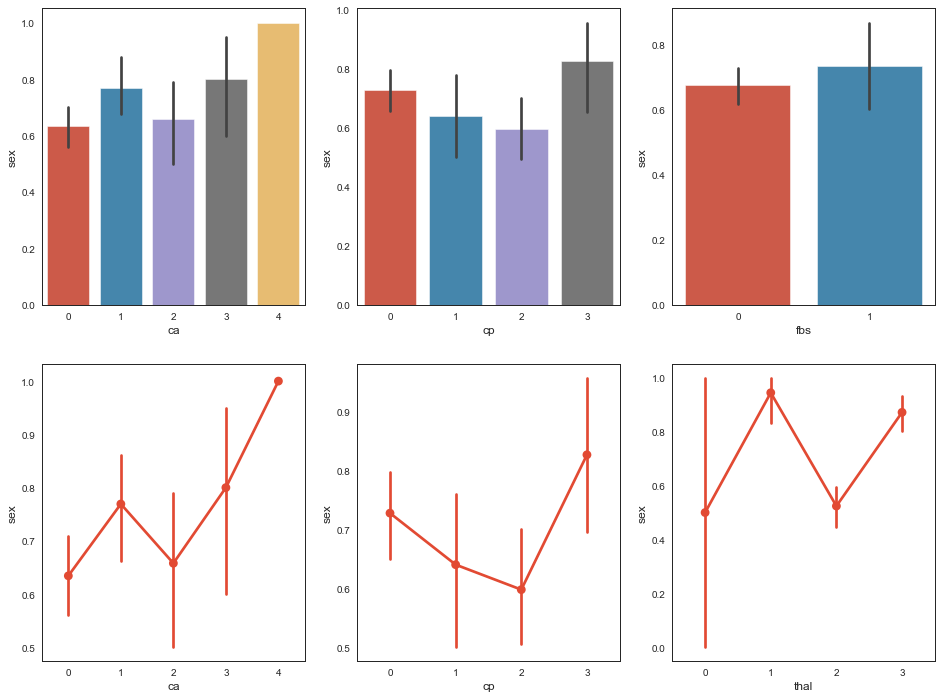

In [49]:
#we will use seaborn graphics for multi-variable comparison: https://seaborn.pydata.org/api.html

#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'ca', y = 'sex', data=df, ax = saxis[0,0])
sns.barplot(x = 'cp', y = 'sex', order=[0,1,2,3], data=df, ax = saxis[0,1])
sns.barplot(x = 'fbs', y = 'sex', order=[0,1], data=df, ax = saxis[0,2])

sns.pointplot(x = 'ca', y = 'sex',  data=df, ax = saxis[1,0])
sns.pointplot(x = 'cp', y = 'sex',  data=df, ax = saxis[1,1])
sns.pointplot(x = 'thal', y = 'sex', data=df, ax = saxis[1,2]);

Text(0.5, 1.0, 'Slope vs Age Target Comparison')

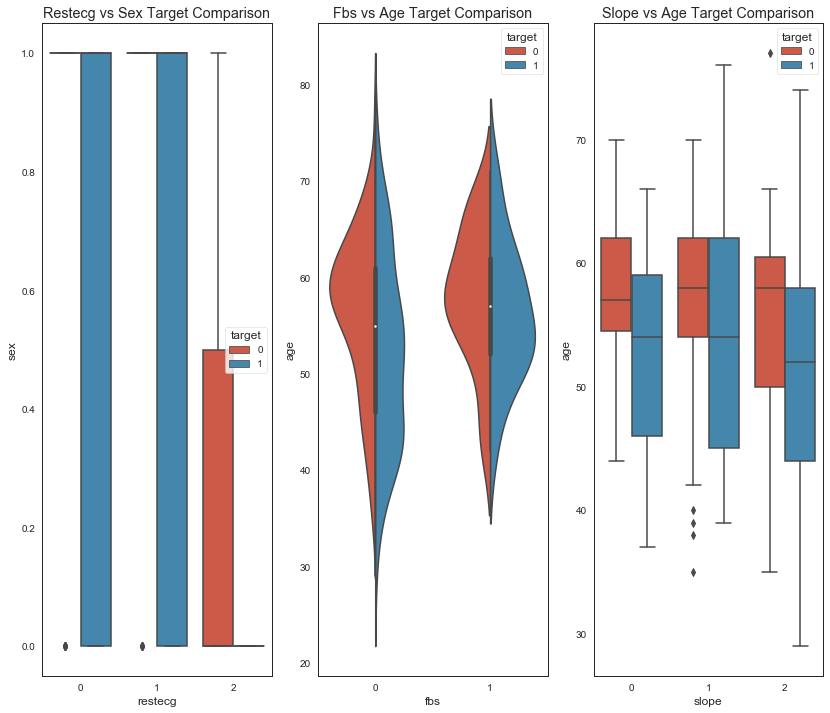

In [31]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

# this one doesn't make sense to me
sns.boxplot(x = 'restecg', y = 'sex', hue = 'target', data = df, ax = axis1)
axis1.set_title('Restecg vs Sex Target Comparison')

sns.violinplot(x = 'fbs', y = 'age', hue = 'target', data = df, split = True, ax = axis2)
axis2.set_title('Fbs vs Age Target Comparison')

sns.boxplot(x = 'slope', y ='age', hue = 'target', data = df, ax = axis3)
axis3.set_title('Slope vs Age Target Comparison')

In [32]:
# #more side-by-side comparisons
# fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

# #how does cp factor with sex & target compare
# sns.pointplot(x="cp", y="target", hue="sex", data=df,
#               palette={"male": "blue", "female": "pink"},
#               markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

# #how does fbs factor with sex & target compare
# sns.pointplot(x="fbs", y="target", hue="sex", data=df,
#               palette={"1": "blue", "0": "pink"},
#               markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

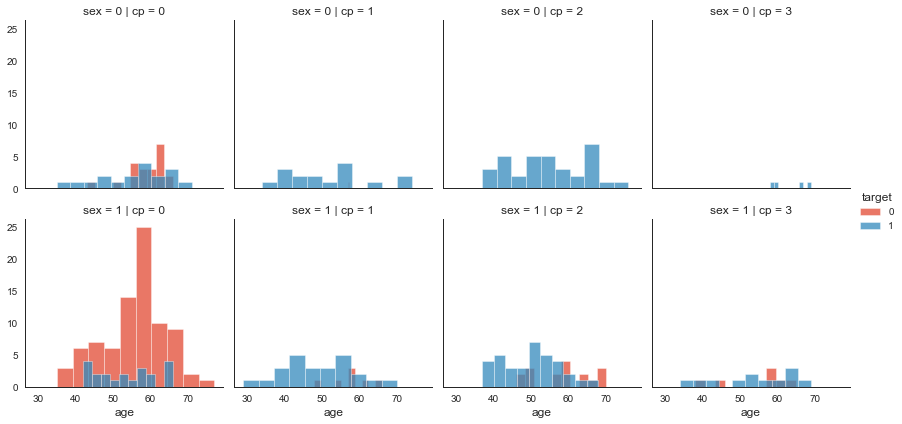

In [53]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(df, row = 'sex', col = 'cp', hue = 'target')
h.map(plt.hist, 'age', alpha = .75)
h.add_legend();

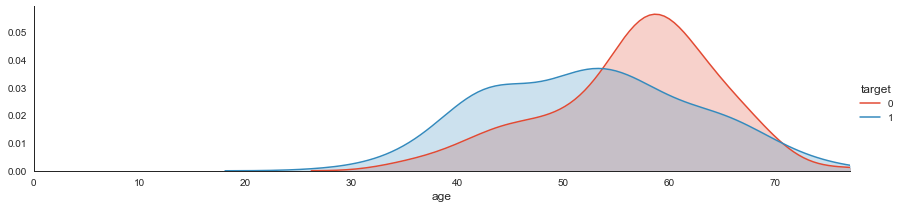

In [34]:
#plot distributions of ages of patients
a = sns.FacetGrid(df, hue = 'target', aspect=4 )
a.map(sns.kdeplot, 'age', shade= True )
a.set(xlim=(0 , df['age'].max()))
a.add_legend()

### Feature Engineering

In [31]:
# how many unique values our features have?
pd.DataFrame({'Feature':df.nunique().index, 'Unique values':df.nunique().values})

,Feature,Unique values
0,age,41
1,sex,2
2,cp,4
3,trestbps,49
4,chol,152
5,fbs,2
6,restecg,3
7,thalach,91
8,exang,2
9,oldpeak,40
